In [2]:
import pandas as pd
from IPython.display import HTML, Image
from IPython.display import display as ipy_display
from ugbio_single_cell.sc_qc_dataclasses import H5Keys

In [3]:
# style
IMAGE_WIDTH = 800


def highlight_below_threshold(s, threshold):
    if pd.api.types.is_numeric_dtype(s):
        return ["background-color: yellow" if v < threshold else "" for v in s]
    return ["" for _ in s]  # return an empty list for non-numeric columns


def format_number(x):
    if isinstance(x, float):
        return f"{x:.2f}"
    elif isinstance(x, int):
        return f"{x:.0f}"
    else:
        return x


def print_warning(warning):
    ipy_display(HTML(f'<p style="color:red">{warning}</p>'))

In [28]:
# input parameters
statistics_h5 = None
cbc_umi_png = None
insert_length_png = None
mean_insert_quality_histogram_png = None
quality_per_position_png = None
pass_trim_rate_threshold = None
read_length_threshold = None
fraction_below_read_length_threshold = None
percent_aligned_threshold = None

In [5]:
files = [statistics_h5, insert_length_png, mean_insert_quality_histogram_png, quality_per_position_png]
for file in files:
    if file is None:
        raise ValueError(f"Missing required input file: {file}.\n Given files are: {files}")

thresholds = [
    pass_trim_rate_threshold,
    read_length_threshold,
    fraction_below_read_length_threshold,
    percent_aligned_threshold,
]
for threshold in thresholds:
    if threshold is None:
        raise ValueError(f"Missing required input threshold: {threshold}.\n Given thresholds are: {thresholds}")

# Main statistics

In [1]:
stats_shortlist = pd.read_hdf(statistics_h5, key=H5Keys.STATISTICS_SHORTLIST.value)
df_stats_shortlist = stats_shortlist.to_frame(name="value")
df_stats_shortlist.index.name = "statistic"
ipy_display(df_stats_shortlist.style.format(format_number))
print("\n\n\n\n")

### Trimmer failure codes

In [25]:
df_trimmer_failure_codes = pd.read_hdf(statistics_h5, key=H5Keys.TRIMMER_FAILURE_CODES.value)
ipy_display(df_trimmer_failure_codes.style.format(format_number))
total_failures = df_trimmer_failure_codes.loc["total", "PCT_failure"].iloc[0]
if total_failures > pass_trim_rate_threshold:
    print_warning(f"Total failure rate is above threshold ({pass_trim_rate_threshold}%): {total_failures:.2f}%")
print("\n\n\n\n")

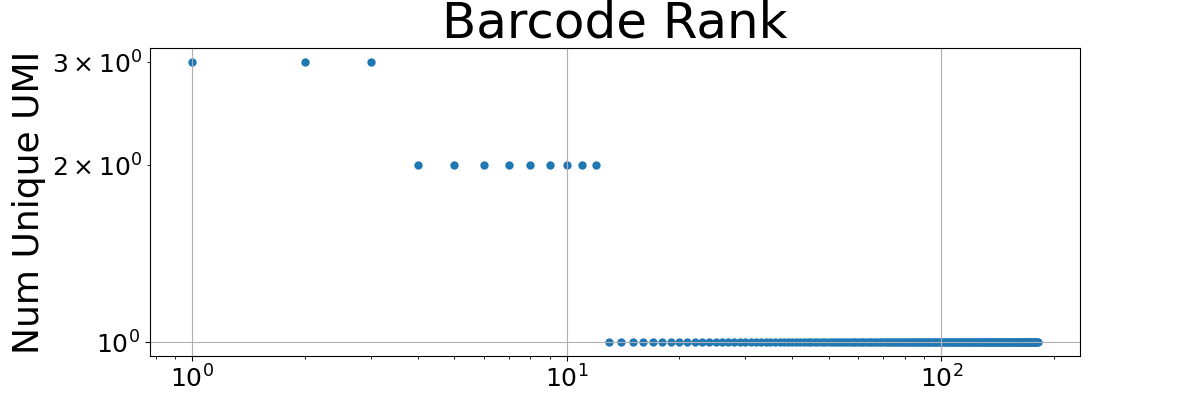

Plot of UMI counts per cell barcode. x-axis is the cell barcodes, ordered by UMI count.  y-axis is the UMI count







In [47]:
if cbc_umi_png:
    ipy_display(Image(cbc_umi_png, width=IMAGE_WIDTH))
    caption = (
        "Plot of counts per cell barcode. x-axis is the cell barcodes, ordered by UMI count "
        "(if exists, otherwise by CBC count).  y-axis is the count."
    )
    print(caption)
    print("\n\n\n\n")

## Insert sequence statistics

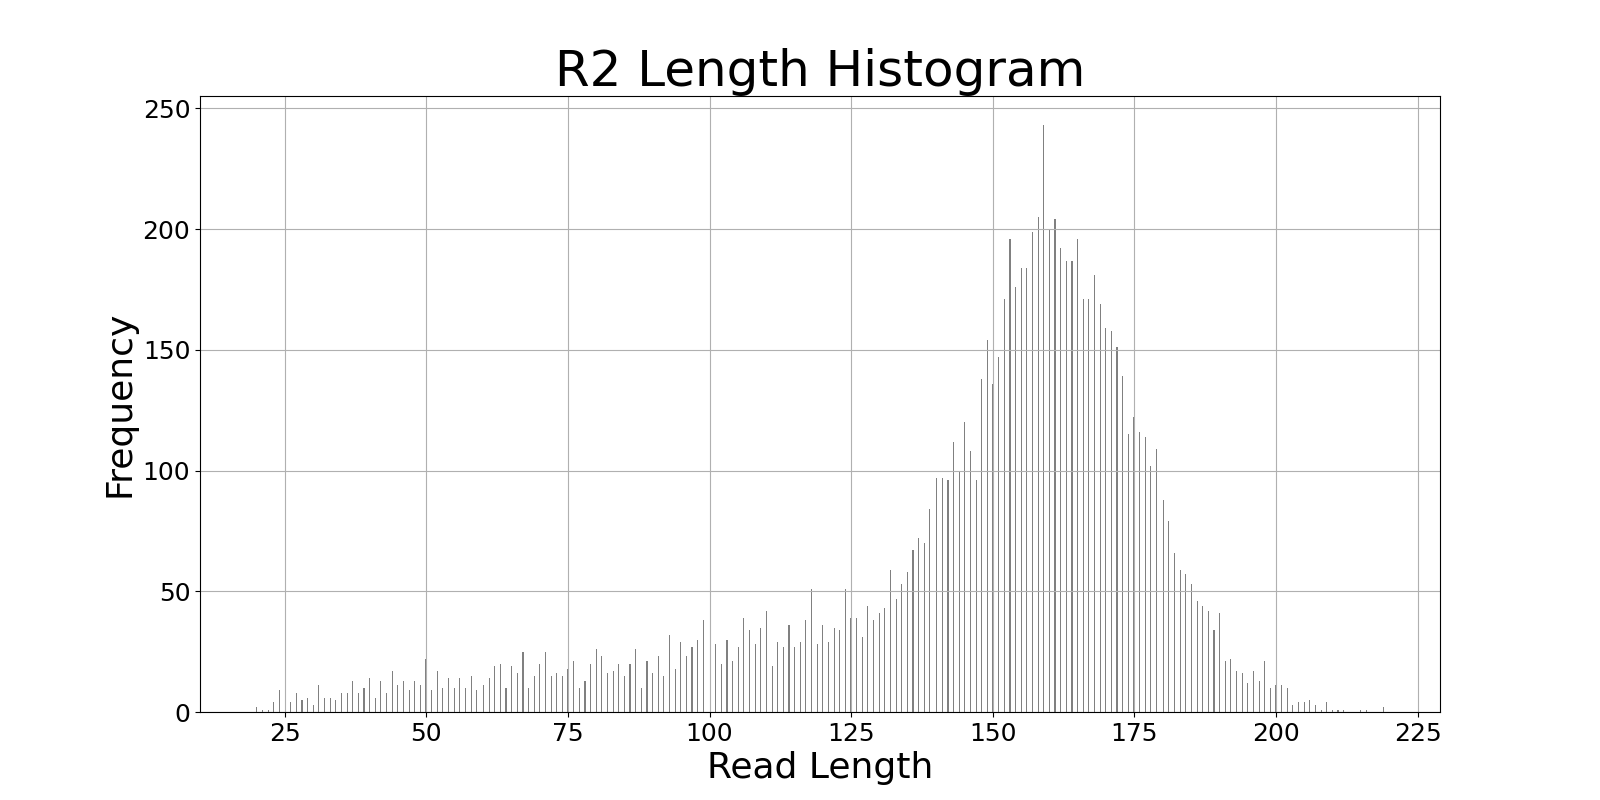

Histogram of Read2 lengths
Fraction of reads below read length: 39.86%
Read length threshold: 150







In [29]:
ipy_display(Image(insert_length_png, width=IMAGE_WIDTH))
caption = "Histogram of insert lengths"
print(caption)

insert_lengths = pd.read_hdf(statistics_h5, key=H5Keys.INSERT_LENGTHS.value)
below_read_length_threshold = insert_lengths[insert_lengths < read_length_threshold]
fraction_below_read_length = below_read_length_threshold.count() / insert_lengths.count() * 100


if fraction_below_read_length > fraction_below_read_length_threshold:
    print_warning(
        f"Fraction of reads below read length is above threshold "
        f"({fraction_below_read_length_threshold}%): {fraction_below_read_length:.2f}%"
    )
else:
    print(f"Fraction of reads below read length threshold: {fraction_below_read_length:.2f}%")
print(f"Read length threshold: {read_length_threshold}")
print("\n\n\n\n")

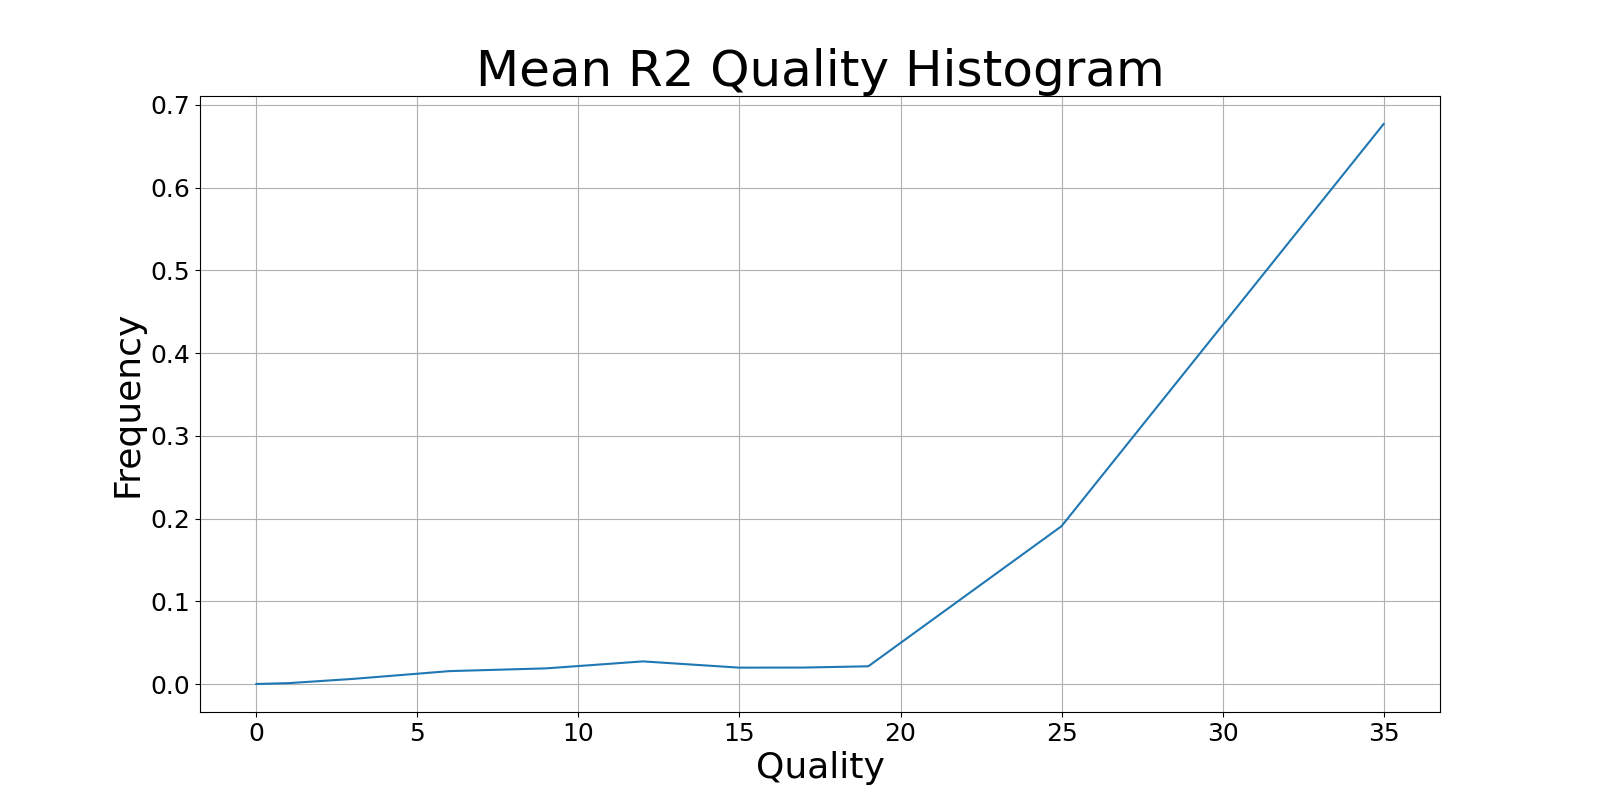

Histogram of mean quality scores for Read2







In [9]:
ipy_display(Image(mean_insert_quality_histogram_png, width=IMAGE_WIDTH))
caption = "Histogram of mean quality scores for insert"
print(caption)
print("\n\n\n\n")

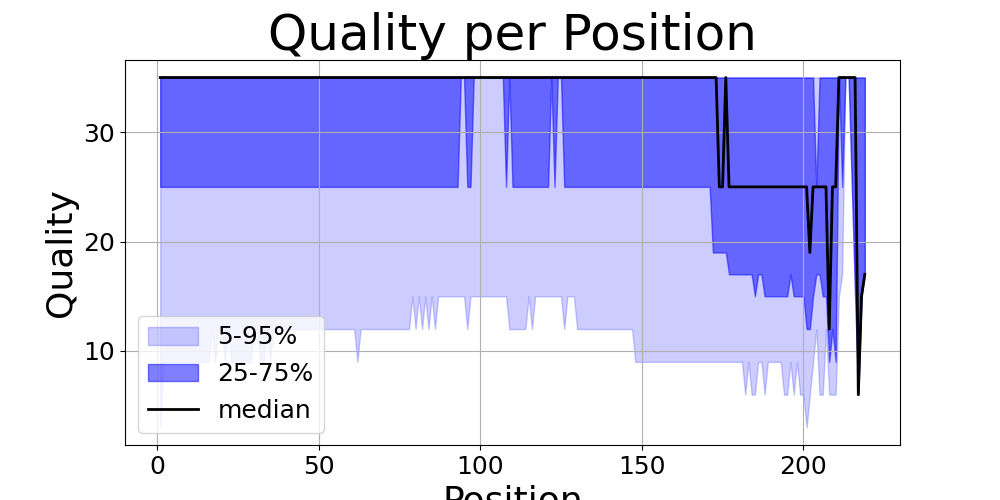

Quality per position for Read2







In [10]:
ipy_display(Image(quality_per_position_png, width=IMAGE_WIDTH))
caption = "Quality per position for insert"
print(caption)
print("\n\n\n\n")

## STAR statistics

In [15]:
star_stats = pd.read_hdf(statistics_h5, key=H5Keys.STAR_STATS.value)
df_star_stats = star_stats.to_frame(name="value")
ipy_display(df_star_stats.style.format(format_number))
percent_aligned = pd.read_hdf(statistics_h5, key=H5Keys.STATISTICS_SHORTLIST.value).loc["pct_aligned_to_genome"]
if percent_aligned < percent_aligned_threshold:
    print_warning(
        f"Percent aligned to genome is below threshold ({percent_aligned_threshold}%): {percent_aligned:.2f}%"
    )
else:
    print(f"Percent aligned to genome: {percent_aligned:.2f}%")
print("\n\n\n\n")

Percent aligned to genome: 5.21%





